Use pandas, numpy and matplotlib,seaborn
1. Use movies11.csv,movie12.csv,movie13.csv and rating11.csv file and solve following
2. find all masala movie - (action ,romance,comedy,thriller)
3. plot a pie chart to represent genre and frequency of movie count
4. average rating for each movie and merge 2 frames
5. draw pie chart for each genre and average rating
6. draw bar graph for each rating and number of movies

### 1. Use movies11.csv,movie12.csv,movie13.csv and rating11.csv file and solve following 

In [216]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv("movies11.csv")
df2 = pd.read_csv("movie12.csv",header=None)
df3 = pd.read_csv("movies13.csv",header=None)
rating = pd.read_csv("rating11.csv")
df2.columns=df1.columns
df3.columns=df1.columns

movies=pd.concat([df1,df2,df3],ignore_index=True)

### 2. find all masala movie - (action ,romance,comedy,thriller)

In [217]:
masala_genre=['Action','Romance','Comedy','Thriller']
filter=movies[movies['genres'].apply(lambda x: all(genres in x.split('|') for genres in masala_genre))]
filter

movieId                                              title  \
351        380                                   True Lies (1994)   
2358      2468                          Jumpin' Jack Flash (1986)   
4599      4719                               Osmosis Jones (2001)   
4835      4956                              Stunt Man, The (1980)   
6429      6564  Lara Croft Tomb Raider: The Cradle of Life (2003)   
6579      6714               So Close (Chik Yeung Tin Sai) (2002)   
9666     31367                                  Chase, The (1994)   
10265    34435                                      Sholay (1975)   

                                                  genres  
351             Action|Adventure|Comedy|Romance|Thriller  
2358                      Action|Comedy|Romance|Thriller  
4599   Action|Animation|Comedy|Crime|Drama|Romance|Th...  
4835      Action|Adventure|Comedy|Drama|Romance|Thriller  
6429            Action|Adventure|Comedy|Romance|Thriller  
6579                      Action|Comedy|Romance|Thriller  
9666      Action|Adventure|Comedy|Crime|Romance|Thriller  
10265   Action|Adventure|Comedy|Musical|Romance|Thriller

### 3. plot a pie chart to represent genre and frequency of movie count

In [213]:
# genre_count = movies['genres'].value_counts()
# genre_counprint(genre)t
movies['genres']=movies['genres'].str.split('|')
genre= movies['genres']
genre

0        [Adventure, Animation, Children, Comedy, Fantasy]
1                           [Adventure, Children, Fantasy]
2                                        [Comedy, Romance]
3                                 [Comedy, Drama, Romance]
4                                                 [Comedy]
                               ...                        
10669          [Action, Adventure, Comedy, Drama, Romance]
10670                                      [Comedy, Drama]
10671                                              [Drama]
10672                                    [Comedy, Romance]
10673                             [Drama, Horror, Mystery]
Name: genres, Length: 10674, dtype: object

In [214]:
count=0
for gen in genre:
    print(gen)
#     print(data)
#     print("*"*60)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']
['Adventure', 'Children', 'Fantasy']
['Comedy', 'Romance']
['Comedy', 'Drama', 'Romance']
['Comedy']
['Action', 'Crime', 'Thriller']
['Comedy', 'Romance']
['Adventure', 'Children']
['Action']
['Action', 'Adventure', 'Thriller']
['Comedy', 'Drama', 'Romance']
['Comedy', 'Horror']
['Adventure', 'Animation', 'Children']
['Drama']
['Action', 'Adventure', 'Romance']
['Crime', 'Drama']
['Drama', 'Romance']
['Comedy']
['Comedy']
['Action', 'Comedy', 'Crime', 'Drama', 'Thriller']
['Comedy', 'Crime', 'Thriller']
['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller']
['Action', 'Crime', 'Thriller']
['Drama', 'Sci-Fi']
['Drama', 'Romance']
['Drama']
['Children', 'Drama']
['Drama', 'Romance']
['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi']
['Crime', 'Drama']
['Drama']
['Mystery', 'Sci-Fi', 'Thriller']
['Adventure', 'Romance', 'IMAX']
['Children', 'Drama']
['Drama', 'Romance']
['Crime', 'Drama']
['Documentary', 'IMAX']
['Children', 'Co

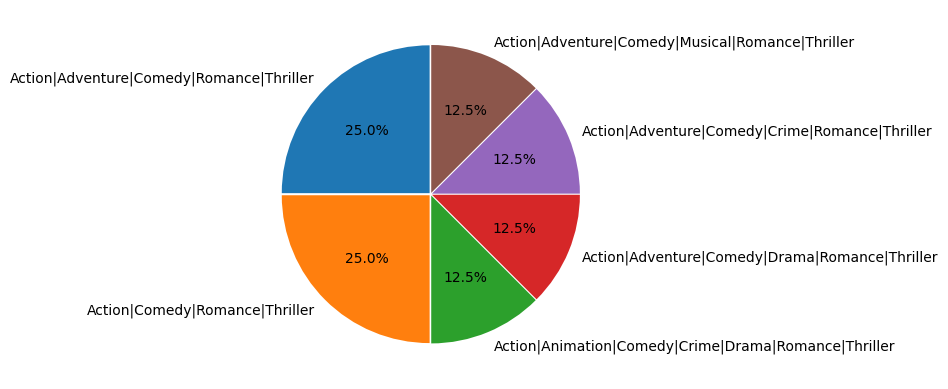

In [174]:
plt.pie(genre_count,labels=genre_count.index,explode=(0.01,0.01,0.01,0.01,0.01,0.01),startangle=90,autopct='%.1f%%')
plt.show()

### 4. Average rating for each movie and merge 2 frames

In [139]:
g=rating.groupby('movieId')
for mid,data in g:
    print("Movie id : ",mid)
    print(data)
    print("*"*60)

Movie id :  1
       userId  movieId  rating   timestamp
11          3        1     4.0   944919407
29          6        1     5.0   858275452
48          8        1     4.0   833981871
60         10        1     4.0   943497887
63         11        1     4.5  1230858821
...       ...      ...     ...         ...
57898    7110        1     4.0  1199461240
57946    7116        1     4.0  1139540576
57957    7117        1     4.0   903025677
57985    7119        1     5.0   834332667
57997    7120        1     4.5  1175542052

[2569 rows x 4 columns]
************************************************************
Movie id :  2
       userId  movieId  rating   timestamp
0           1        2     3.5  1112486027
19          5        2     3.0   851527569
86         13        2     3.0   849082742
222        29        2     3.0   835562174
281        34        2     3.0   846509384
...       ...      ...     ...         ...
57842    7100        2     3.5  1323015669
57850    7102        2    

In [128]:
rdata=g['rating'].mean()
print(rdata)

movieId
1      3.959323
2      3.268398
3      3.186861
4      3.000000
5      3.143836
         ...   
153    2.921099
154    3.794798
155    3.440678
156    3.505556
157    2.729927
Name: rating, Length: 153, dtype: float64


In [164]:
merge=pd.merge(movies,rdata,on='movieId')
merge

movieId                                     title  \
0          1                          Toy Story (1995)   
1          2                            Jumanji (1995)   
2          3                   Grumpier Old Men (1995)   
3          4                  Waiting to Exhale (1995)   
4          5        Father of the Bride Part II (1995)   
..       ...                                       ...   
124      153                     Batman Forever (1995)   
125      154  Beauty of the Day (Belle de jour) (1967)   
126      155                     Beyond Rangoon (1995)   
127      156                   Blue in the Face (1995)   
128      157                     Canadian Bacon (1995)   

                                          genres    rating  
0    Adventure|Animation|Children|Comedy|Fantasy  3.959323  
1                     Adventure|Children|Fantasy  3.268398  
2                                 Comedy|Romance  3.186861  
3                           Comedy|Drama|Romance  3.000000  
4                                         Comedy  3.143836  
..                                           ...       ...  
124                Action|Adventure|Comedy|Crime  2.921099  
125                                        Drama  3.794798  
126                          Adventure|Drama|War  3.440678  
127                                 Comedy|Drama  3.505556  
128                                   Comedy|War  2.729927  

[129 rows x 4 columns]

### 5. draw pie chart for each genre and average rating

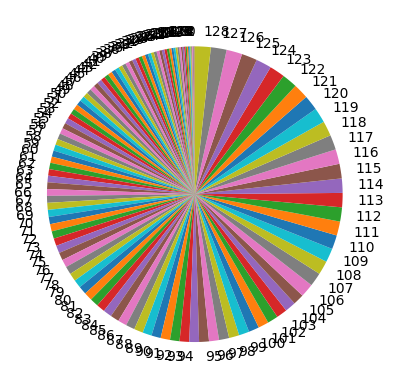

In [167]:
plt.pie(merge.movieId,labels=merge.index,startangle=90)
plt.show()

In [163]:
genres_count = movies['genres'].value_counts()
genres_count

genres
Drama                                                      1795
Comedy                                                      972
Comedy|Drama                                                529
Drama|Romance                                               467
Comedy|Romance                                              370
                                                           ... 
Crime|Film-Noir|Mystery|Romance                               1
Adventure|Animation|Children|Comedy|Fantasy|Sci-Fi|IMAX       1
Adventure|Animation|Children|Drama|Musical                    1
Adventure|Film-Noir|Sci-Fi|Thriller                           1
Crime|Drama|Fantasy|Thriller                                  1
Name: count, Length: 824, dtype: int64

### 6. draw bar graph for each rating and number of movies